In [2]:
import IPython
%matplotlib widget

import matplotlib.pyplot as plt

import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator

import seaborn as sns
import pandas as pd

In [60]:
def retrieve(dir):
  with open(f"{dir}/GridSearch.log", "r") as file:
    lines = file.readlines()[1:]
  
  data = np.array(list(map(lambda line: line.strip().split('\t'), lines))).T
  data = data.astype(float)
  np.round(data, decimals=5)
  X, Y, Z = data[1], data[2], data[3]

  max_i = np.argmax(Z)
  print(data[:, max_i])
  _, x_, y_, z_ = data[:, max_i]

  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,
                       alpha=0.8)

  # Customize the z axis.
  # ax.set_zlim(-1.01, 1.01)
  # ax.zaxis.set_major_locator(LinearLocator())
  # A StrMethodFormatter is used automatically
  # ax.zaxis.set_major_formatter('{x:.02f}')

  fig.colorbar(surf, shrink=0.5, aspect=5)
  # ax.plot([x_, x_],[y_, y_],[z_-20, z_+10],'k-',alpha=1.0, linewidth=2)
  plt.savefig(f"{dir}/figure.png")
  plt.show()

[ 1.94600000e+03  7.84000000e-01  8.00840000e-02 -3.22985259e+02]


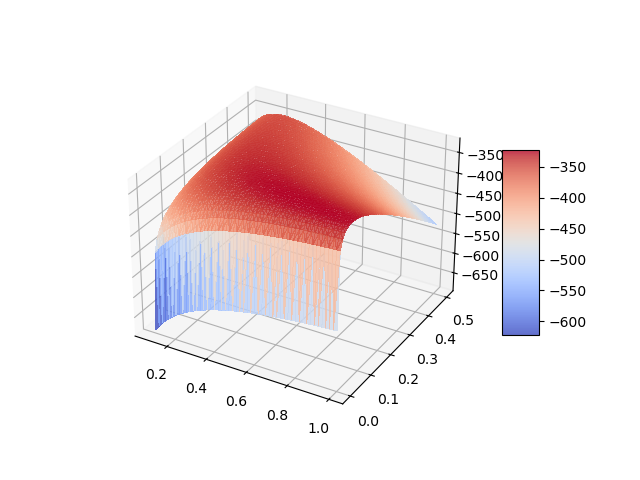

In [61]:
retrieve("0.6_0.1/v2/")

In [65]:
def retrieve_heatmap(dir):
  with open(f"{dir}/GridSearch.log", "r") as file:
    lines = file.readlines()[1:]
  
  data = np.array(list(map(lambda line: line.strip().split('\t'), lines))).T
  data = data.astype(float)
  np.round(data, decimals=5)
  X, Y, Z = data[1], data[2], data[3]
  Z_table = data[3].reshape((51, 51))

  max_i = np.argmax(Z)
  print(data[:, max_i])
  _, x_, y_, z_ = data[:, max_i]

  fig, ax = plt.subplots()

  heatmap = ax.imshow(Z_table,cmap='inferno',extent=[0.0001, 0.5, 0.1, 1],interpolation='nearest',origin='lower',aspect='auto')
  ax.set(xlabel='K', ylabel='c')

  fig.colorbar(heatmap, shrink=0.5, aspect=5)
  # ax.plot([x_, x_],[y_, y_],[z_-20, z_+10],'k-',alpha=1.0, linewidth=2)
  plt.savefig(f"{dir}/figure.png")
  plt.show()

[ 1.64100000e+03  6.76000000e-01  9.00820000e-02 -7.68572857e+02]


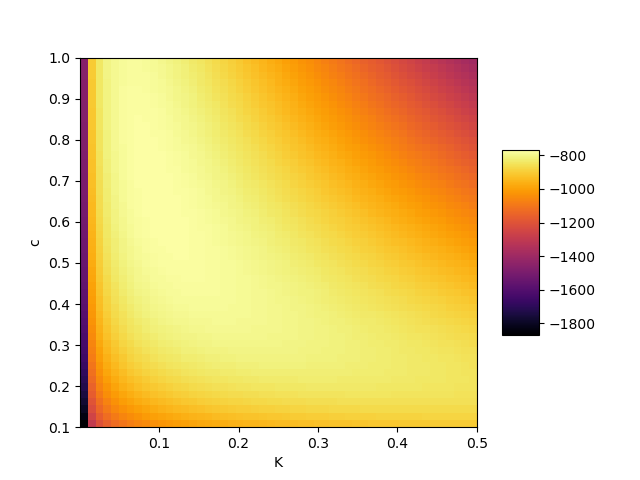

In [71]:
retrieve_heatmap("0.6_0.1/v3/")